In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 'Age', 'Cabin', 'Embarked'columns has the null values so need to handle them
- also the 'cabin' column has most of the missing values i.e 687 and can not be manupulated  imputing mean so droping the 'cabin' column from data frame

In [8]:
df=df.drop(columns='Cabin', axis=1)

- 'Age' is numerical column so imputing with mean value

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

- Embarked is catagorical column so filling it with Mode Imputation

In [11]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

-  No null value present in data

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA

<AxesSubplot:xlabel='Sex', ylabel='count'>

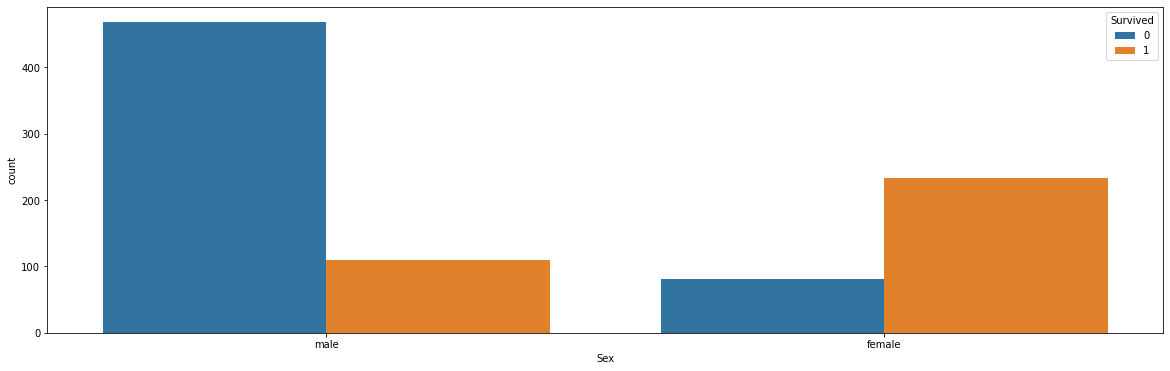

In [23]:
# number of people survived(Male&Female)
plt.figure(figsize=(20,6))
sns.countplot('Sex', hue='Survived',data= df)


In [24]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

- From above data out of 577 male present on titanic only about 100 male is survived, where as from 314 female more than 200 were survived 
- Number of Female survived is more which gives an insight of that Females has been given priority to be saved

<AxesSubplot:xlabel='Pclass', ylabel='count'>

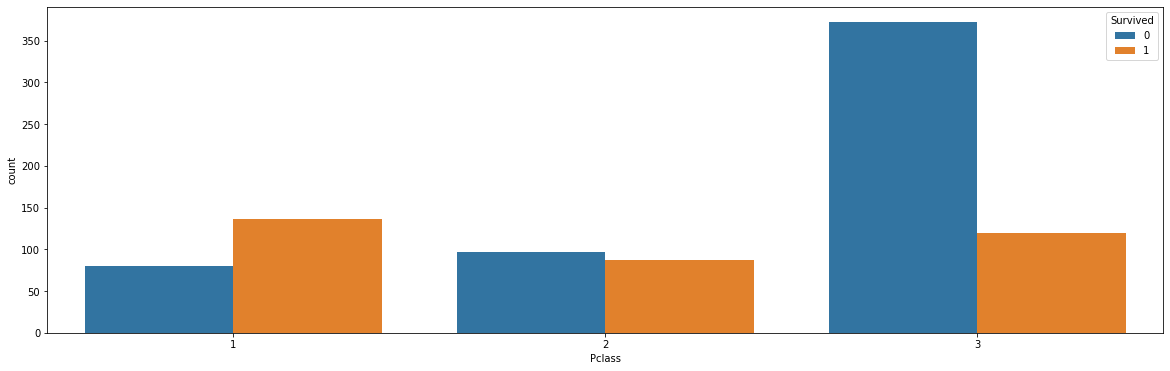

In [26]:
# number of people survived(Pclass)
plt.figure(figsize=(20,6))
sns.countplot('Pclass', hue='Survived',data= df)

In [27]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

From the above data 1st class had 216 pasengers from which arount 140 pasengers had been saved 
where as from 2nd and class out of 184 pasengers around 90 pasengers survived
But from 3rd class which has 491 pasengers the number of pasengers survived is around 130
which shows the number of pasengers survived in 1st class are more as compared to other two classes

<AxesSubplot:xlabel='Pclass', ylabel='count'>

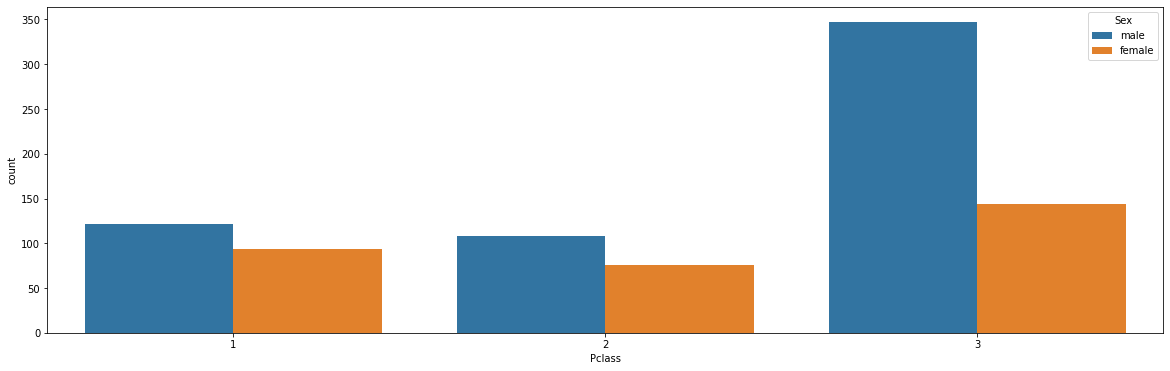

In [30]:
# sex(Pclass)
plt.figure(figsize=(20,6))
sns.countplot('Pclass', hue='Sex',data= df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

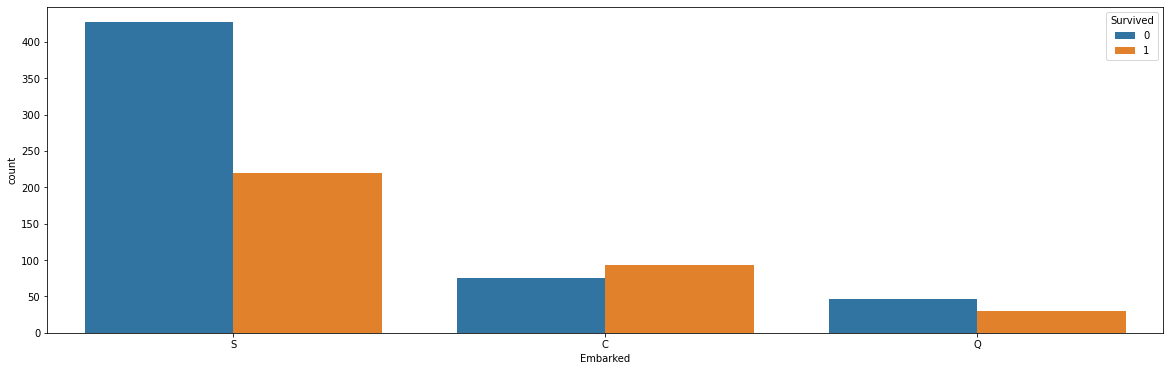

In [33]:
# number of people survived(Pclass)
plt.figure(figsize=(20,6))
sns.countplot('Embarked', hue='Survived',data= df)

Embarked represents the port of embakation where from port 's'(Southampton) around 200 pasengers are survived 
from port 'c'(Cherbourg) around 110 pasengers were survived 
from port 'Q'(Queenstown) very less that is around 40 pasengers has been survived

### Outliers Checking

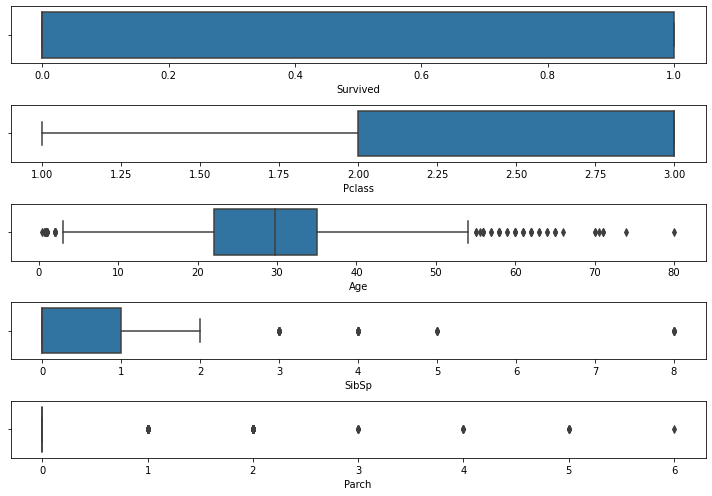

In [35]:
fig, axs = plt.subplots(5, figsize = (10,7))
pt1 = sns.boxplot(df['Survived'], ax = axs[0])
pt2 = sns.boxplot(df['Pclass'], ax = axs[1])
pt3 = sns.boxplot(df['Age'], ax = axs[2])
pt4 = sns.boxplot(df['SibSp'], ax = axs[3])
pt5 = sns.boxplot(df['Parch'], ax = axs[4])
plt.tight_layout()


In [37]:
# Calculate correlations
corr = df.corr()
corr


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

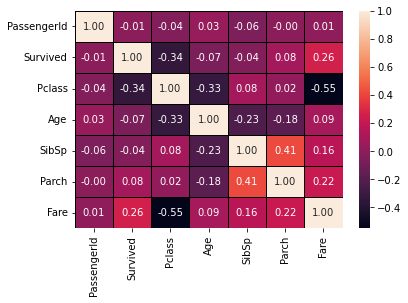

In [38]:
# Heatmap
sns.heatmap(corr,  annot=True,linewidths=0.5,linecolor="black", fmt=".2f")

In [40]:
# Convert chatagorical data to numerical data

In [43]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

### Removing the columns which not needed

In [46]:
df.drop(['PassengerId','Name', 'Ticket'],axis=1,inplace=True)

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


#### Train Test Split

In [50]:
X=df.drop('Survived',axis=1)

In [51]:
Y=df['Survived']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=2, test_size=0.2)

In [57]:
Lr = LogisticRegression()

In [58]:
Lr.fit(X_train, Y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

In [61]:
X_train_pred = Lr.predict(X_train)

In [63]:
train_accuracy = accuracy_score(Y_train,X_train_pred  )

In [66]:
print('Accuracy score training data:', train_accuracy*100 )

Accuracy score training data: 80.75842696629213


In [67]:
X_test_pred = Lr.predict(X_test)

In [68]:
test_accuracy = accuracy_score(Y_test,X_test_pred  )

In [69]:
print('Accuracy score test data:', test_accuracy*100 )

Accuracy score test data: 78.2122905027933


In [70]:
import pickle
filename = 'ServivalPred.pkl'
pickle.dump(Lr,open(filename, 'wb'))

In [71]:
loaded_model = pickle.load(open('ServivalPred.pkl','rb'))
result = loaded_model.score(X_test,Y_test)
print(result*100)

78.2122905027933
